In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ProcessedDataset.csv')
df

,Unnamed: 0,Наименование,Скидка,Цена,Цена со скидкой,Бренд,feedbacks,rating,Ссылка,high_rating,memory_size
0,0,"9 5G 4 6.6"" 120 герц",36,21990,14073,Realme,1116,5,https://www.wildberries.ru/catalog/121028588/d...,1,128Gb
1,2,Reno 7 8,43,27990,15954,OPPO,357,5,https://www.wildberries.ru/catalog/116872732/d...,1,128Gb
2,3,Reno 7 8,43,27990,15954,OPPO,288,5,https://www.wildberries.ru/catalog/116872733/d...,1,128Gb
3,4,SMART 6 PLUS 2,40,9990,5994,Infinix,1813,5,https://www.wildberries.ru/catalog/114477948/d...,1,64Gb
4,5,NOTE 12 2023 8,35,22990,14943,Infinix,118,5,https://www.wildberries.ru/catalog/128728547/d...,1,256Gb
...,...,...,...,...,...,...,...,...,...,...,...
1114,2740,M5 4 6.58 FHD MTK G99,18,16990,13931,POCO,2,5,https://www.wildberries.ru/catalog/106176120/d...,1,128Gb
1115,2761,Redmi 10C,31,18990,13103,Xiaomi,2,5,https://www.wildberries.ru/catalog/90422386/de...,1,64Gb
1116,2763,Galaxy S5 SM-G900F,0,10990,10990,Samsung,1,1,https://www.wildberries.ru/catalog/96896454/de...,0,16Gb
1117,2771,"C25s 6,5"" 4 64гб HD 6000 мАч NFC",0,12990,12990,Realme,1,5,https://www.wildberries.ru/catalog/46016394/de...,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1119 non-null   int64 
 1   Наименование     1118 non-null   object
 2   Скидка           1119 non-null   int64 
 3   Цена             1119 non-null   int64 
 4   Цена со скидкой  1119 non-null   int64 
 5   Бренд            1119 non-null   object
 6   feedbacks        1119 non-null   int64 
 7   rating           1119 non-null   int64 
 8   Ссылка           1119 non-null   object
 9   high_rating      1119 non-null   int64 
 10  memory_size      904 non-null    object
dtypes: int64(7), object(4)
memory usage: 96.3+ KB


In [4]:
df.describe()

,Unnamed: 0,Скидка,Цена,Цена со скидкой,feedbacks,rating,high_rating
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,1081.634495,18.508490,32476.696157,25667.806971,68.911528,4.544236,0.904379
std,724.393994,14.508947,35229.438046,27550.579648,325.548413,0.917705,0.294202
min,0.000000,0.000000,2990.000000,2610.000000,1.000000,1.000000,0.000000
25%,535.500000,5.000000,11990.000000,9558.500000,2.000000,4.000000,1.000000
50%,918.000000,19.000000,18990.000000,15192.000000,7.000000,5.000000,1.000000
75%,1765.500000,30.000000,37990.000000,29989.500000,27.000000,5.000000,1.000000
max,2786.000000,95.000000,275990.000000,218032.000000,7890.000000,5.000000,1.000000


In [5]:
df['rating'].value_counts()

5    810
4    202
3     50
1     37
2     20
Name: rating, dtype: int64

In [6]:
rating_count = df['rating'].value_counts(normalize=True).sort_index()*100.0
rating_count

1     3.306524
2     1.787310
3     4.468275
4    18.051832
5    72.386059
Name: rating, dtype: float64

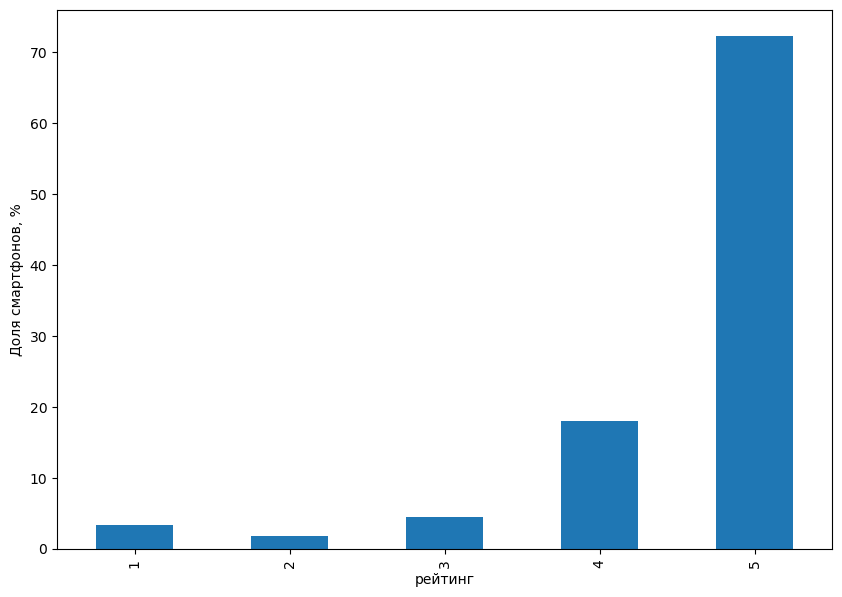

In [7]:
fig = plt.figure(figsize=(10, 7))
rating_count.plot.bar(ylabel='Доля смартфонов, %', xlabel='рейтинг');

Больше 70% смартфонов имеют рейтинг выше 70%

**График вышел не сильно информативным, на первый взгляд**

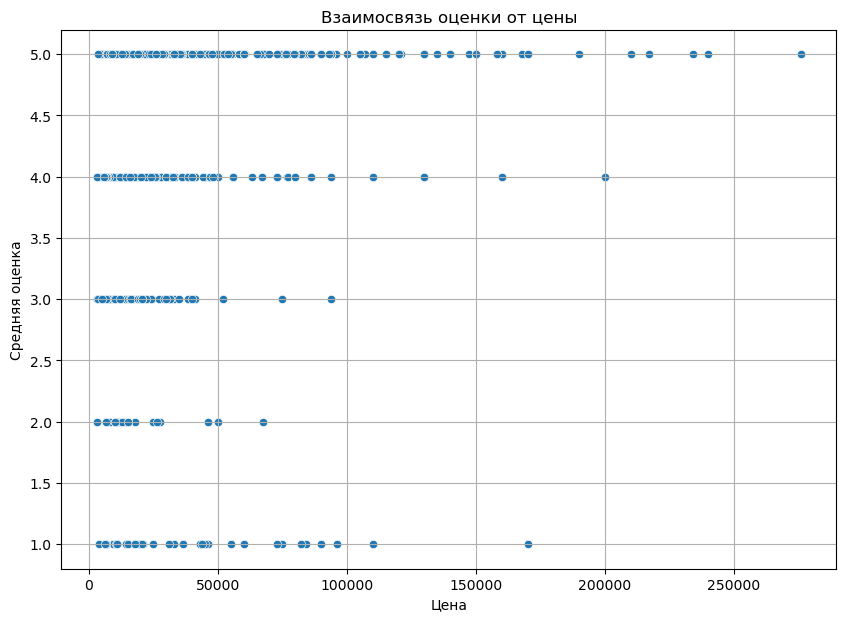

In [8]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=df,
    x="Цена",
    y="rating")
scatterplot.set_title('Взаимосвязь оценки от цены')
scatterplot.set_xlabel('Цена')
scatterplot.set_ylabel('Средняя оценка')
scatterplot.grid();

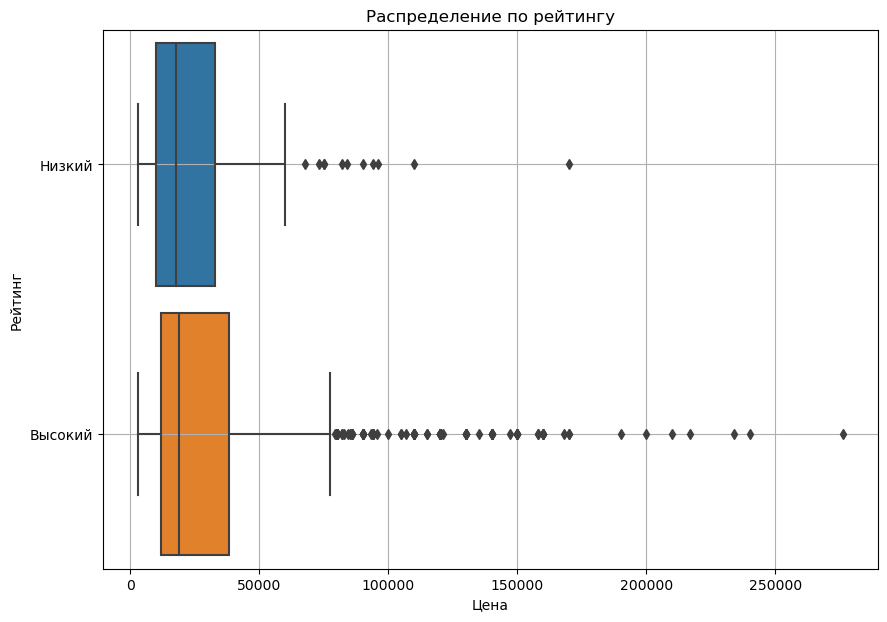

In [9]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='high_rating',
    x='Цена',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение по рейтингу')
boxplot.set_xlabel('Цена')
boxplot.set_ylabel('Рейтинг')
boxplot.set_yticklabels(['Низкий','Высокий'])
boxplot.grid();

In [27]:
df['memory_size'].value_counts()

128Gb    312
64Gb     148
32Gb      99
256Gb     95
4Gb       77
8Gb       48
6Gb       28
2Gb       25
512Gb     24
3Gb       23
16Gb      17
12Gb       4
1Gb        3
114Gb      1
Name: memory_size, dtype: int64

Наиболее часто представлены телефоны с объемом памяти 128Gb

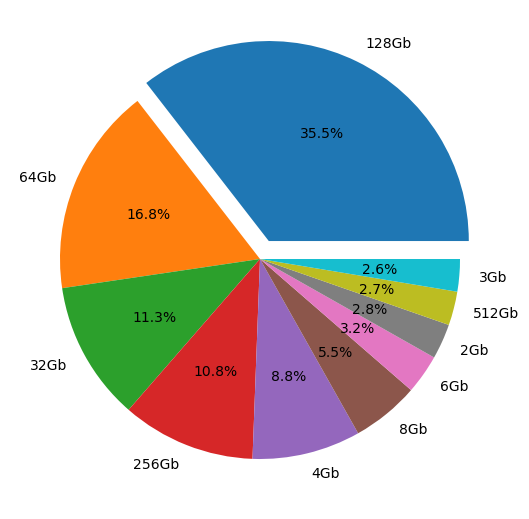

In [29]:
memory_count = df['memory_size'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    memory_count,
    labels=memory_count.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [33]:
df['high_memory'] = np.where(df['memory_size'].isin(['128Gb', '256Gb', '512Gb']), 1, 0)
df

,Unnamed: 0,Наименование,Скидка,Цена,Цена со скидкой,Бренд,feedbacks,rating,Ссылка,high_rating,memory_size,high_memory
0,0,"9 5G 4 6.6"" 120 герц",36,21990,14073,Realme,1116,5,https://www.wildberries.ru/catalog/121028588/d...,1,128Gb,1
1,2,Reno 7 8,43,27990,15954,OPPO,357,5,https://www.wildberries.ru/catalog/116872732/d...,1,128Gb,1
2,3,Reno 7 8,43,27990,15954,OPPO,288,5,https://www.wildberries.ru/catalog/116872733/d...,1,128Gb,1
3,4,SMART 6 PLUS 2,40,9990,5994,Infinix,1813,5,https://www.wildberries.ru/catalog/114477948/d...,1,64Gb,0
4,5,NOTE 12 2023 8,35,22990,14943,Infinix,118,5,https://www.wildberries.ru/catalog/128728547/d...,1,256Gb,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2740,M5 4 6.58 FHD MTK G99,18,16990,13931,POCO,2,5,https://www.wildberries.ru/catalog/106176120/d...,1,128Gb,1
1115,2761,Redmi 10C,31,18990,13103,Xiaomi,2,5,https://www.wildberries.ru/catalog/90422386/de...,1,64Gb,0
1116,2763,Galaxy S5 SM-G900F,0,10990,10990,Samsung,1,1,https://www.wildberries.ru/catalog/96896454/de...,0,16Gb,0
1117,2771,"C25s 6,5"" 4 64гб HD 6000 мАч NFC",0,12990,12990,Realme,1,5,https://www.wildberries.ru/catalog/46016394/de...,1,NaN,0


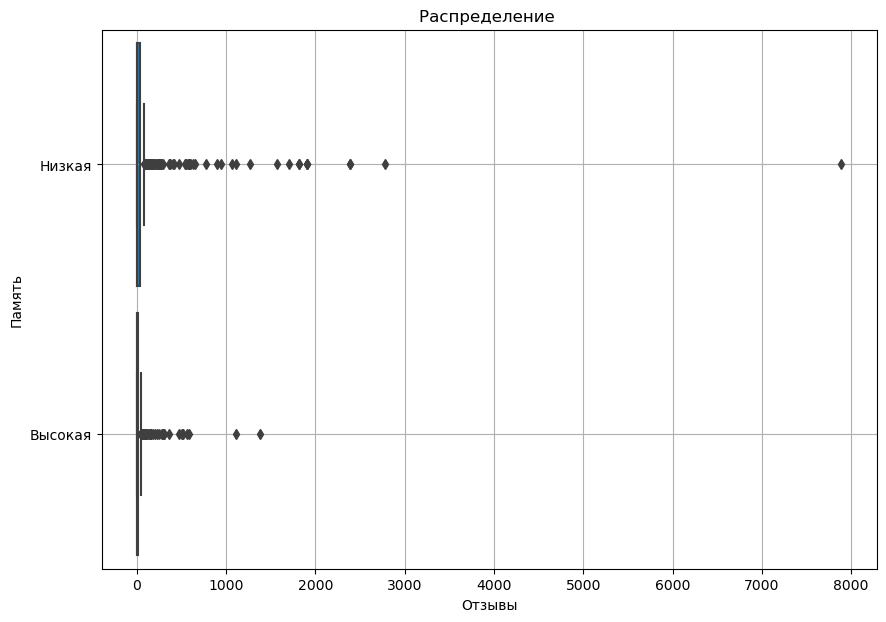

In [34]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='high_memory',
    x='feedbacks',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение ')
boxplot.set_xlabel('Отзывы')
boxplot.set_ylabel('Память')
boxplot.set_yticklabels(['Низкая','Высокая'])
boxplot.grid();

Самый представленный бренд - Самсунг

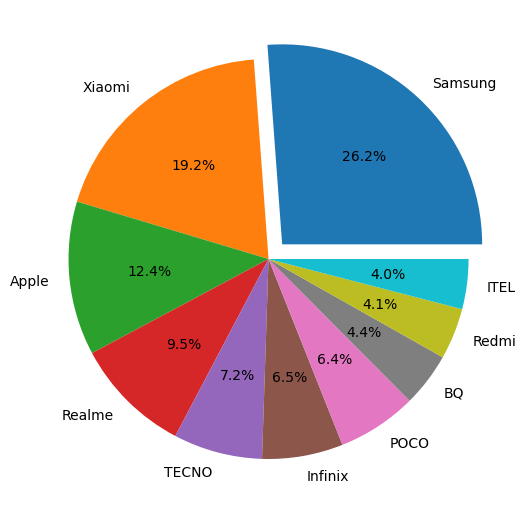

In [10]:
Brand_combinations = df['Бренд'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Brand_combinations,
    labels=Brand_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [16]:
mean_by_brand = df.groupby(['Бренд'])[['feedbacks', 'rating']].mean().reset_index()
mean_by_brand

,Бренд,feedbacks,rating
0,AYYA,5.000000,3.000000
1,Alcatel,7.333333,4.333333
2,Apple,9.929825,4.412281
3,Ayala,1.000000,5.000000
4,BLACK FOX,1.000000,3.000000
5,BQ,37.000000,4.100000
6,Black Shark,2.857143,4.857143
7,Blackview,8.666667,4.888889
8,Caterpillar,2.000000,2.666667
9,Coolpad,3.000000,2.666667


**Диаграмма не совсем презентативна т.к. почти у всех на на ней средний рейтинг 5**

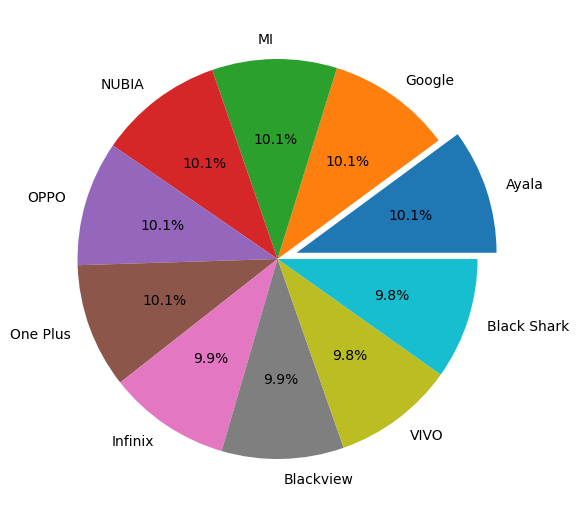

In [24]:
mean_by_brand_10 = mean_by_brand.nlargest(10, 'rating')
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    mean_by_brand_10['rating'],
    labels=mean_by_brand_10['Бренд'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [22]:
summ_by_brand = df.groupby(['Бренд'])[['feedbacks']].sum().reset_index()
summ_by_brand

,Бренд,feedbacks
0,AYYA,10
1,Alcatel,22
2,Apple,1132
3,Ayala,1
4,BLACK FOX,1
5,BQ,1480
6,Black Shark,20
7,Blackview,78
8,Caterpillar,6
9,Coolpad,9


Наибольшее количество отзывов у Xiaomi

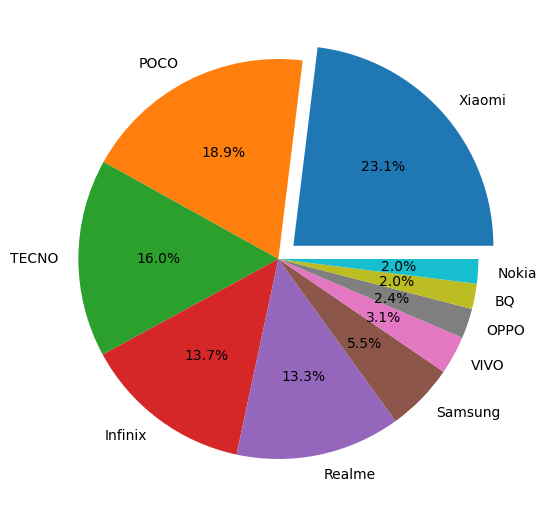

In [36]:
summ_by_brand_10 = summ_by_brand.nlargest(10, 'feedbacks')
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    summ_by_brand_10['feedbacks'],
    labels=summ_by_brand_10['Бренд'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);